<a href="https://colab.research.google.com/github/pablogcgh/LSTM-experiments/blob/main/LSTM_Hansel%26Gretel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Near a great forest there lived a poor woodcutter and his wife, and his two children; the boy's name was Hansel and the girl's Grethel.
2. They had very little to bite or to sup, and once, when there was great dearth in the land, the man could not even gain the daily bread.
3. As he lay in bed one night thinking of this, and turning and tossing, he sighed heavily, and said to his wife, "What will become of us?
4. we cannot even feed our children; there is nothing left for ourselves."
"I will tell you what, husband," answered the wife; "we will take the children early in the morning into the forest, where it is thickest; we will make them a fire, and we will give each of them a piece of bread, then we will go to our work and leave them alone; they will never find the way home again, and we shall be quit of them."
"No, wife," said the man, "I cannot do that; I cannot find in my heart to take my children into the forest and to leave them there alone; the wild animals would soon come an

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Next sentiment prediction: 0.173


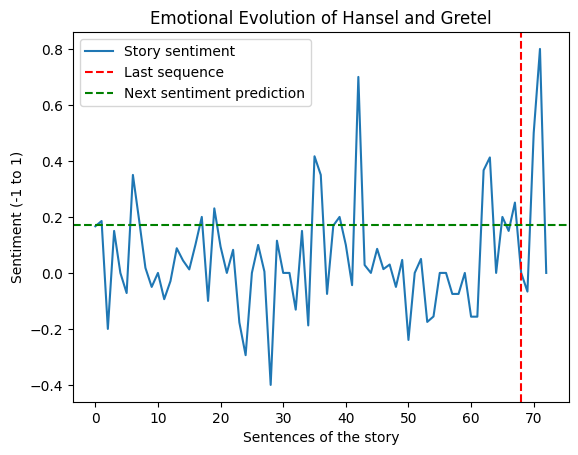

In [22]:
import numpy as np
import re
import matplotlib.pyplot as plte
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from textblob import TextBlob  # Para análisis de sentimiento

# 1) We load the Hansel and Gretel story (obtained from https://www.grimmstories.com/en/grimm_fairy-tales/hansel_and_gretel)
story = """
Near a great forest there lived a poor woodcutter and his wife, and his two children; the boy's name was Hansel and the girl's Grethel. They had very little to bite or to sup, and once, when there was great dearth in the land, the man could not even gain the daily bread. As he lay in bed one night thinking of this, and turning and tossing, he sighed heavily, and said to his wife, "What will become of us? we cannot even feed our children; there is nothing left for ourselves."
"I will tell you what, husband," answered the wife; "we will take the children early in the morning into the forest, where it is thickest; we will make them a fire, and we will give each of them a piece of bread, then we will go to our work and leave them alone; they will never find the way home again, and we shall be quit of them."
"No, wife," said the man, "I cannot do that; I cannot find in my heart to take my children into the forest and to leave them there alone; the wild animals would soon come and devour them." - "O you fool," said she, "then we will all four starve; you had better get the coffins ready," and she left him no peace until he consented. "But I really pity the poor children," said the man.
The two children had not been able to sleep for hunger, and had heard what their step-mother had said to their father. Grethel wept bitterly, and said to Hansel, "It is all over with us."
"Do be quiet, Grethel," said Hansel, "and do not fret; 1 will manage something." And when the parents had gone to sleep he got up, put on his little coat, opened the back door, and slipped out. The moon was shining brightly, and the white flints that lay in front of the house glistened like pieces of silver. Hansel stooped and filled the little pocket of his coat as full as it would hold. Then he went back again, and said to Grethel, "Be easy, dear little sister, and go to sleep quietly; God will not forsake us," and laid himself down again in his bed. When the day was breaking, and before the sun had risen, the wife came and awakened the two children, saying, "Get up, you lazy bones; we are going into the forest to cut wood." Then she gave each of them a piece of bread, and said, "That is for dinner, and you must not eat it before then, for you will get no more." Grethel carried the bread under her apron, for Hansel had his pockets full of the flints. Then they set off all together on their way to the forest. When they had gone a little way Hansel stood still and looked back towards the house, and this he did again and again, till his father said to him, "Hansel, what are you looking at? take care not to forget your legs."
"O father," said Hansel, "lam looking at my little white kitten, who is sitting up on the roof to bid me good-bye." - "You young fool," said the woman, "that is not your kitten, but the sunshine on the chimney-pot." Of course Hansel had not been looking at his kitten, but had been taking every now and then a flint from his pocket and dropping it on the road. When they reached the middle of the forest the father told the children to collect wood to make a fire to keep them, warm; and Hansel and Grethel gathered brushwood enough for a little mountain j and it was set on fire, and when the flame was burning quite high the wife said, "Now lie down by the fire and rest yourselves, you children, and we will go and cut wood; and when we are ready we will come and fetch you."
So Hansel and Grethel sat by the fire, and at noon they each ate their pieces of bread. They thought their father was in the wood all the time, as they seemed to hear the strokes of the axe: but really it was only a dry branch hanging to a withered tree that the wind moved to and fro. So when they had stayed there a long time their eyelids closed with weariness, and they fell fast asleep.
When at last they woke it was night, and Grethel began to cry, and said, "How shall we ever get out of this wood? "But Hansel comforted her, saying, "Wait a little while longer, until the moon rises, and then we can easily find the way home." And when the full moon got up Hansel took his little sister by the hand, and followed the way where the flint stones shone like silver, and showed them the road. They walked on the whole night through, and at the break of day they came to their father's house. They knocked at the door, and when the wife opened it and saw that it was Hansel and Grethel she said, "You naughty children, why did you sleep so long in the wood? we thought you were never coming home again!" But the father was glad, for it had gone to his heart to leave them both in the woods alone.
Not very long after that there was again great scarcity in those parts, and the children heard their mother say at night in bed to their father, "Everything is finished up; we have only half a loaf, and after that the tale comes to an end. The children must be off; we will take them farther into the wood this time, so that they shall not be able to find the way back again; there is no other way to manage." The man felt sad at heart, and he thought, "It would better to share one's last morsel with one's children." But the wife would listen to nothing that he said, but scolded and reproached him. He who says A must say B too, and when a man has given in once he has to do it a second time.
But the children were not asleep, and had heard all the talk. When the parents had gone to sleep Hansel got up to go out and get more flint stones, as he did before, but the wife had locked the door, and Hansel could not get out; but he comforted his little sister, and said, "Don't cry, Grethel, and go to sleep quietly, and God will help us." Early the next morning the wife came and pulled the children out of bed. She gave them each a little piece of "bread -less than before; and on the way to the wood Hansel crumbled the bread in his pocket, and often stopped to throw a crumb on the ground. "Hansel, what are you stopping behind and staring for?" said the father.
"I am looking at my little pigeon sitting on the roof, to say good-bye to me," answered Hansel. "You fool," said the wife, "that is no pigeon, but the morning sun shining on the chimney pots." Hansel went on as before, and strewed bread crumbs all along the road. The woman led the children far into the wood, where they had never been before in all their lives. And again there was a large fire made, and the mother said, "Sit still there, you children, and when you are tired you can go to sleep; we are going into the forest to cut wood, and in the evening, when we are ready to go home we will come and fetch you."
So when noon came Grethel shared her bread with Hansel, who had strewed his along the road. Then they went to sleep, and the evening passed, and no one came for the poor children. When they awoke it was dark night, and Hansel comforted his little sister, and said, "Wait a little, Grethel, until the moon gets up, then we shall be able to see the way home by the crumbs of bread that I have scattered along it."
So when the moon rose they got up, but they could find no crumbs of bread, for the birds of the woods and of the fields had come and picked them up. Hansel thought they might find the way all the same, but they could not. They went on all that night, and the next day from the morning until the evening, but they could not find the way out of the wood, and they were very hungry, for they had nothing to eat but the few berries they could pick up. And when they were so tired that they could no longer drag themselves along, they lay down under a tree and fell asleep.
It was now the third morning since they had left their father's house. They were always trying to get back to it, but instead of that they only found themselves farther in the wood, and if help had not soon come they would have been starved.
About noon they saw a pretty snow-white bird sitting on a bough, and singing so sweetly that they stopped to listen. And when he had finished the bird spread his wings and flew before them, and they followed after him until they came to a little house, and the bird perched on the roof, and when they came nearer they saw that the house was built of bread, and roofed with cakes; and the window was of transparent sugar. "We will have some of this," said Hansel, "and make a fine meal. I will eat a piece of the roof, Grethel, and you can have some of the window-that will taste sweet." So Hansel reached up and broke off a bit of the roof, just to see how it tasted, and Grethel stood by the window and gnawed at it. Then they heard a thin voice call out from inside,
"Nibble, nibble, like a mouse,
Who is nibbling at my house?"
And the children answered,
"Never mind, It is the wind."
And they went on eating, never disturbing themselves. Hansel, who found that the roof tasted very nice, took down a great piece of it, and Grethel pulled out a large round window-pane, and sat her down and began upon it.
Then the door opened, and an aged woman came out, leaning upon a crutch. Hansel and Grethel felt very frightened, and let fall what they had in their hands. The old woman, however, nodded her head, and said, "Ah, my dear children, how come you here? you must come indoors and stay with me, you will be no trouble." So she took them each by the hand, and led them into her little house. And there they found a good meal laid out, of milk and pancakes, with sugar, apples, and nuts. After that she showed them two little white beds, and Hansel and Grethel laid themselves down on them, and thought they were in heaven.
The old woman, although her behaviour was so kind, was a wicked witch, who lay in wait for children, and had built the little house on purpose to entice them. When they were once inside she used to kill them, cook them, and eat them, and then it was a feast day with her. The witch's eyes were red, and she could not see very far, but she had a keen scent, like the beasts, and knew very well when human creatures were near. When she knew that Hansel and Grethel were coming, she gave a spiteful laugh, and said triumphantly, "I have them, and they shall not escape me!"
Early in the morning, before the children were awake, she got up to look at them, and as they lay sleeping so peacefully with round rosy cheeks, she said to herself, "What a fine feast I shall have!" Then she grasped Hansel with her withered hand, and led him into a little stable, and shut him up behind a grating; and call and scream as he might, it was no good. Then she went back to Grethel and shook her, crying, "Get up, lazy bones; fetch water, and cook something nice for your brother; he is outside in the stable, and must be fattened up. And when he is fat enough I will eat him." Grethel began to weep bitterly, but it was of no use, she had to do what the wicked witch bade her. And so the best kind of victuals was cooked for poor Hansel, while Grethel got nothing but crab-shells.
Each morning the old woman visited the little stable, and cried, "Hansel, stretch out your finger, that I may tell if you will soon be fat enough." Hansel, however, used to hold out a little bone, and the old woman, who had weak eyes, could not see what it was, and supposing it to be Hansel's finger, wondered very much that it was not getting fatter.
When four weeks had passed and Hansel seemed to remain so thin, she lost patience and could wait no longer. "Now then, Grethel," cried she to the little girl; "be quick and draw water; be Hansel fat or be he lean, tomorrow I must kill and cook him." Oh what a grief for the poor little sister to have to fetch water, and how the tears flowed down over her cheeks! "Dear God, pray help us!" cried she; "if we had been devoured by wild beasts in the wood at least we should have died together."
"Spare me your lamentations," said the old woman; "they are of no avail." Early next morning Grethel had to get up, make the fire, and fill the kettle. "First we will do the baking," said the old woman; "I nave heated the oven already, and kneaded the dough." She pushed poor Grethel towards the oven, out of which the flames were already shining.
"Creep in," said the witch, "and see if it is properly hot, so that the bread may be baked." And Grethel once in, she meant to shut the door upon her and let her be baked, and then she would have eaten her. But Grethel perceived her intention, and said, "I don't know how to do it: how shall I get in?"
"Stupid goose," said the old woman, "the opening is big enough, do you see? I could get in myself!" and she stooped down and put her head in the oven's mouth. Then Grethel gave her a push, so that she went in farther, and she shut the iron door upon her, and put up the bar. Oh how frightfully she howled! but Grethel ran away, and left the wicked witch to burn miserably.
Grethel went straight to Hansel, opened the stable-door, and cried, "Hansel, we are free! the old witch is dead!" Then out flew Hansel like a bird from its cage as soon as the door is opened. How rejoiced they both were! how they fell each on the other's neck! and danced about, and kissed each other! And as they had nothing more to fear they went over all the old witch's house, and in every corner there stood chests of pearls and precious stones. "This is something better than flint stones," said Hansel, as he filled his pockets, and Grethel, thinking she also would like to carry something home with her, filled her apron full. i! Now, away we go," said Hansel, "if we only can get out of the witch's wood." When they had journeyed a few hours they came to a great piece of water. "We can never get across this," said Hansel, "I see no stepping-stones and no bridge."
"And there is no boat either," said Grethel; "but here comes a white duck; if I ask her she will help us over." So she cried,
"Duck, duck, here we stand,
Hansel and Grethel, on the land,
Stepping-stones and bridge we lack,
Carry us over on your nice white back."
And the duck came accordingly, and Hansel got upon her and told his sister to come too. "No," answered Grethel, "that would be too hard upon the duck; we can go separately, one after the other." And that was how it was managed, and after that they went on happily, until they came to the wood, and the way grew more and more familiar, till at last they saw in the distance their father's house. Then they ran till they came up to it, rushed in at the door, and fell on their father's neck. The man had not had a quiet hour since he left his children in the wood; but the wife was dead. And when Grethel opened her apron the pearls and precious stones were scattered all over the room, and Hansel took one handful after another out of his pocket. Then was all care at an end, and they lived in great joy together. My tale is done, there runs a mouse, whosoever catches it, may make himself a big fur cap out of it.

"""

# 2) We define a function to split the sentences

def split_sentences(text):
    # Pattern to match sentence-ending punctuation, but exclude punctuation inside quotes
    sentences = re.split(r'(?<!")(?<=[.!?]) +', text)
    return [s.strip() for s in sentences]


# 3) We split the sentences from our story
sentences = split_sentences(story)

# 4) We print the split sentences
for n, sentence in enumerate(sentences):
    print(f"{n+1}. {sentence}")


# 5) We build a function in order to perform Sentiment Analysis
def get_sentiment(sentence):
    # We use TextBlob to get a sentiment score (from -1 to 1)
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity

# 6) We apply the function to each split sentence
sentiments = [get_sentiment(sentence) for sentence in sentences]

# 7) We prepare the data for LSTM
def create_sequences(sentiments, time_steps):
    X, y = [], []
    for i in range(len(sentiments) - time_steps):
        X.append(sentiments[i:i + time_steps])  # Emotion sequences
        y.append(sentiments[i + time_steps])    # Next sentiment
    return np.array(X), np.array(y)

# 8) We fix the number of time steps and create a sequence of data for our LSTM model
time_steps = 5  # Number of sentences considered to predict the next emotion
X, y = create_sequences(sentiments, time_steps)

# 9) We reshape our data so it is readable for the LSTM model
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM requires that the data have 3 dimensions (number of data, number of components per data, number of variables per data).

# 10) We build the LSTM model
model = Sequential([
    LSTM(60, activation='tanh', input_shape=(X.shape[1], 1)),  # LSTM layer
    Dense(1)  # Output to predict the next sentiment
])

# 11) We compile the model
model.compile(optimizer='adam', loss='mse')  # We compile the model

# 12) We train the model
model.fit(X, y, epochs=200, verbose=0)

# 13) We predict the next sentiment
input_data = np.array(sentiments[-time_steps:]).reshape((1, time_steps, 1))
prediction = model.predict(input_data)

# 14) We print the prediction for the next sentiment
print(f"Next sentiment prediction: {prediction[0][0]:.3f}")

# 15) Visualization of the emotional evolution
plt.plot(sentiments, label="Story sentiment")
plt.axvline(x=len(sentiments) - time_steps, color='r', linestyle='--', label="Last sequence")
plt.axhline(y=prediction[0][0], color='g', linestyle='--', label="Next sentiment prediction")
plt.legend()
plt.title("Emotional Evolution of Hansel and Gretel")
plt.xlabel("Sentences of the story")
plt.ylabel("Sentiment (-1 to 1)")
plt.show()

